In [1]:
#importing all the libreries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [89]:
#reading the data
df = pd.read_csv('F:\machine learning and deep learning\datasets\master.csv')

In [141]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [172]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [93]:
#dropping the columns with high number of null values
df2 = df[[col for col in df if df[col].count()/len(df)>=.30]]

In [219]:
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,0,0,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,0
1,0,1987,0,1,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1
2,0,1987,1,0,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,0
3,0,1987,0,2,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,2
4,0,1987,0,3,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,3


##### Converting to category

In [174]:
age = df['age'].unique()
A ={}
j=0
for i in age:
    A[i] = j
    j+=1
df2['age'] = df2['age'].map(A)
a = {v: k for k, v in A.items()}
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,0,0,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,0,1987,0,1,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,0,1987,1,0,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,0,1987,0,2,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,0,1987,0,3,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [176]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [177]:
gen = df['generation'].unique()
G ={}
j=0
for i in gen:
    G[i] = j
    j+=1
df2['generation'] = df2['generation'].map(G)
g = {v: k for k, v in G.items()}
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,0,0,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,0
1,0,1987,0,1,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1
2,0,1987,1,0,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,0
3,0,1987,0,2,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,2
4,0,1987,0,3,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,3


In [139]:
sex = df['sex'].unique()
S ={}
j=0
for i in sex:
    S[i] = j
    j+=1
df2['sex'] = df['sex'].map(S)
S
s = {v: k for k, v in S.items()}
s

{0: 'male', 1: 'female'}

In [95]:
country = df['country'].unique()
C ={}
j=0
for i in country:
    C[i] = j
    j+=1
df2['country'] = df['country'].map(S)
c = {v: k for k, v in C.items()}

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,0,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,0,1987,0,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,0,1987,1,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,0,1987,0,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,0,1987,0,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [181]:
#checking for highly correlated feature with target
df2.corr()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
country,1.000000e+00,0.022769,5.217358e-20,1.269341e-04,0.118555,0.158896,0.055224,-1.229154e-03,5.334082e-02,0.002609
year,2.276923e-02,1.000000,0.000000e+00,-2.932878e-03,-0.004546,0.008850,-0.039037,3.667862e-01,3.391343e-01,0.236322
sex,5.217358e-20,0.000000,1.000000e+00,-1.683559e-19,-0.144629,0.011242,-0.391496,0.000000e+00,-1.336263e-18,0.000000
age,1.269341e-04,-0.002933,-1.683559e-19,1.000000e+00,-0.065994,-0.031953,-0.127252,4.995029e-19,-7.849172e-04,0.182379
suicides_no,1.185555e-01,-0.004546,-1.446292e-01,-6.599386e-02,1.000000,0.616162,0.306604,1.513987e-01,6.132975e-02,-0.042450
population,1.588961e-01,0.008850,1.124208e-02,-3.195295e-02,0.616162,1.000000,0.008285,1.029435e-01,8.150986e-02,0.014000
suicides/100k pop,5.522414e-02,-0.039037,-3.914965e-01,-1.272520e-01,0.306604,0.008285,1.000000,7.427907e-02,1.785134e-03,-0.160583
HDI for year,-1.229154e-03,0.366786,0.000000e+00,4.995029e-19,0.151399,0.102943,0.074279,1.000000e+00,7.712278e-01,0.107993
gdp_per_capita ($),5.334082e-02,0.339134,-1.336263e-18,-7.849172e-04,0.061330,0.081510,0.001785,7.712278e-01,1.000000e+00,0.083537
generation,2.609368e-03,0.236322,0.000000e+00,1.823793e-01,-0.042450,0.014000,-0.160583,1.079930e-01,8.353672e-02,1.000000


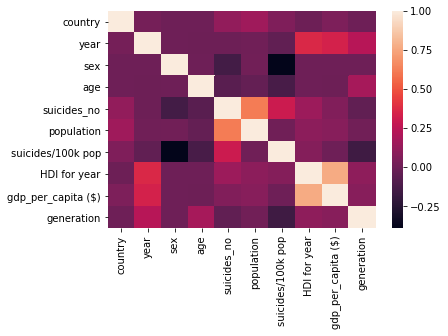

In [180]:
sns.heatmap(df2.corr());

In [109]:
#country wise suicide rate
country_wise = df2[['country','suicides_no']].groupby('country',as_index=False).sum()
country_wise['suicides_no'] = country_wise['suicides_no']/1000

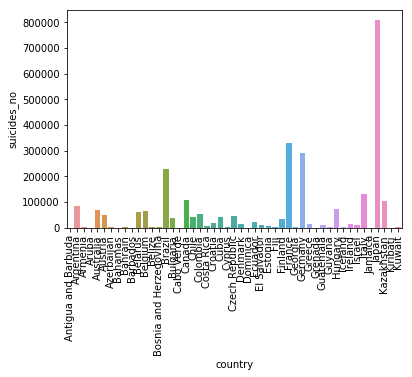

In [125]:
sns.barplot(x='country',y='suicides_no',data=df[['country','suicides_no']].groupby('country',as_index=False).sum().iloc[1:50])
plt.xticks(rotation=90);


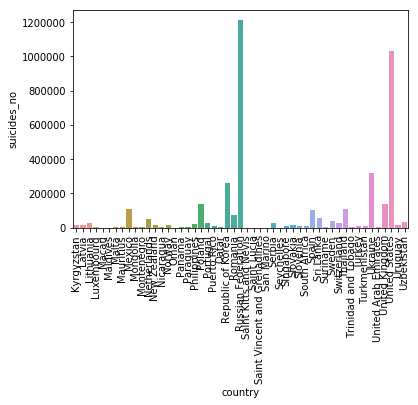

In [126]:
sns.barplot(x='country',y='suicides_no',data=df[['country','suicides_no']].groupby('country',as_index=False).sum().iloc[50:102])
plt.xticks(rotation=90);

In [133]:
#top 10 countries with high suicide rate
top_country = df[['country','suicides_no']].groupby('country',as_index=False).sum().sort_values(by='suicides_no',ascending=False)

### World wide most of the people who commit suicides are from russia, united states,japan and most of them are male  

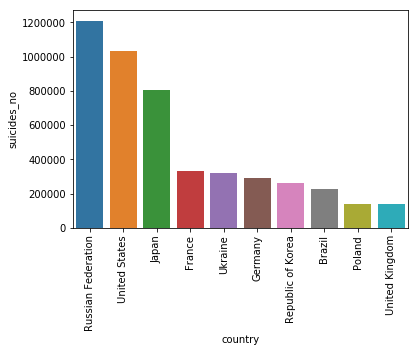

In [134]:
sns.barplot(x='country',y='suicides_no',data=top_country)
plt.xticks(rotation=90);

In [198]:
top_country

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


In [225]:
#suicide rate accourding to sex and age
age_suicide = df[['age','sex','suicides_no']].groupby(['age','sex'],as_index=False).sum()

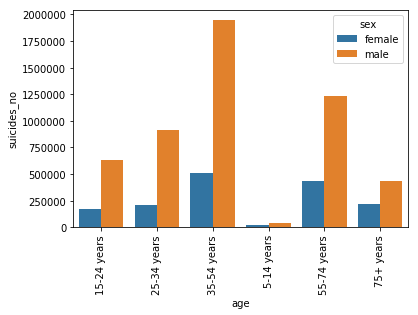

In [231]:
sns.barplot(x='age',y='suicides_no',hue='sex',data=age_suicide)
plt.xticks(rotation=90);

In [206]:
county = df[['country','suicides_no']].groupby('country',as_index=False).sum().sort_values(by='suicides_no',ascending=False)

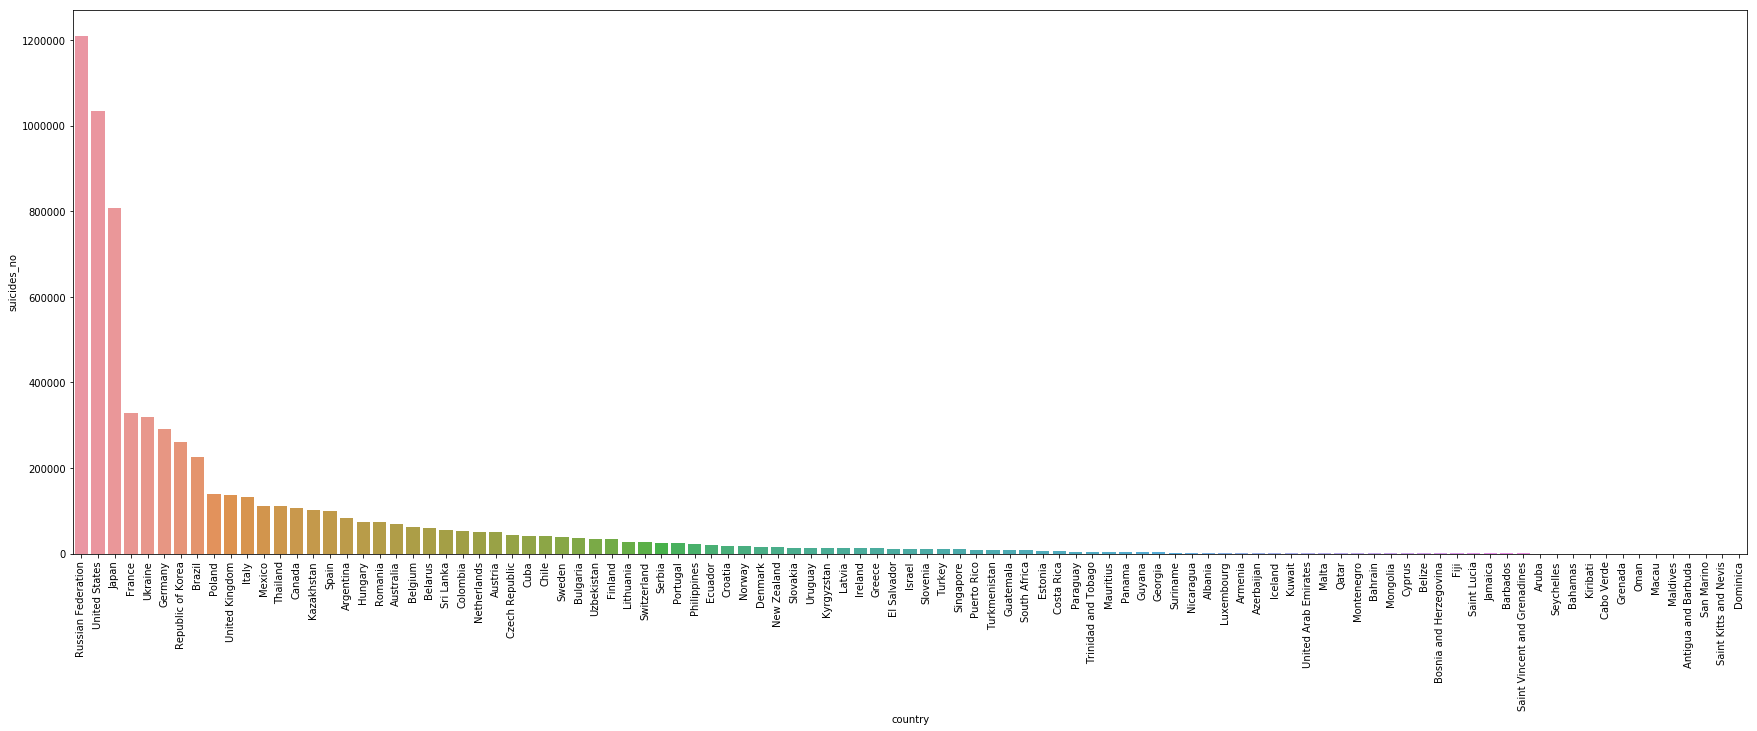

In [250]:
fig=plt.figure(figsize=(30,10))
sns.barplot(x=county['country'],y=county['suicides_no'],data=county)
plt.xticks(rotation=90);


In [143]:
a = df[['sex','suicides_no']].groupby('sex',as_index=False).sum()
#a.sex = a.sex.map(s)
a

,sex,suicides_no
0,female,1559510
1,male,5188910


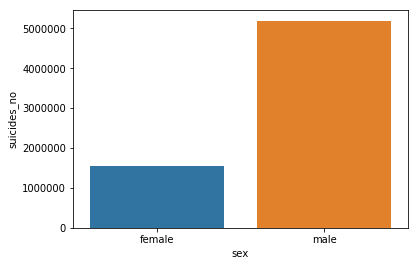

In [144]:
sns.barplot(x='sex',y='suicides_no',data=a);

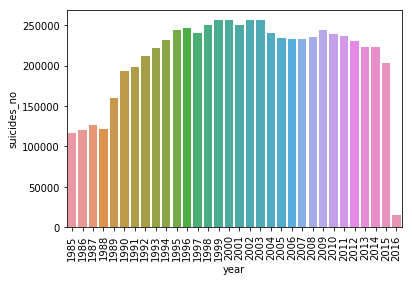

In [151]:
sns.barplot(x='year',y='suicides_no',data=df[['year','suicides_no']].groupby('year',as_index=False).sum())
plt.xticks(rotation=90);

### between 2015 and 2016 united states ans russian govt. tends to control suicides also world wide number of suicides decreased

In [196]:
data=df[['year','suicides_no','sex','country']].groupby(['year','country','sex'],as_index=False).sum().sort_values(by=['suicides_no'],ascending=False)
data[data['year']==2016].head(15)

,year,country,sex,suicides_no
4641,2016,Thailand,male,3275
4637,2016,Romania,male,1643
4623,2016,Hungary,male,1315
4633,2016,Netherlands,male,1273
4619,2016,Czech Republic,male,1060
4613,2016,Austria,male,906
4640,2016,Thailand,female,842
4639,2016,Sweden,male,782
4627,2016,Lithuania,male,693
4632,2016,Netherlands,female,613


In [195]:
data=df[['year','suicides_no','sex','country']].groupby(['year','country','sex'],as_index=False).sum().sort_values(by=['suicides_no'],ascending=False)
data[data['year']==2015].head(10)

,year,country,sex,suicides_no
4607,2015,United States,male,33990
4577,2015,Russian Federation,male,20861
4541,2015,Japan,male,16146
4606,2015,United States,female,10199
4573,2015,Republic of Korea,male,9556
4501,2015,Brazil,male,8766
4525,2015,Germany,male,7403
4540,2015,Japan,female,6946
4603,2015,Ukraine,male,6148
4557,2015,Mexico,male,4986
